In [59]:
import cartopy.crs as ccrs
import cartopy

In [60]:
ccrs.PlateCarree()

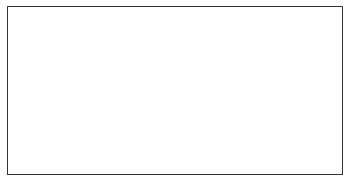

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

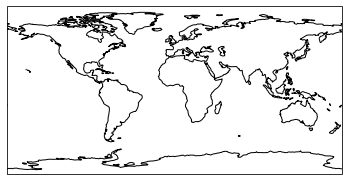

In [62]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

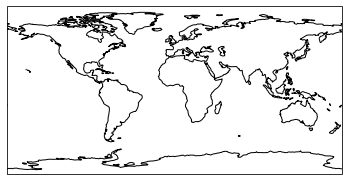

In [63]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

In [64]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           /scratch/midway2/achyutha11/miniconda3/envs/geoLD/lib/python3.8/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:     


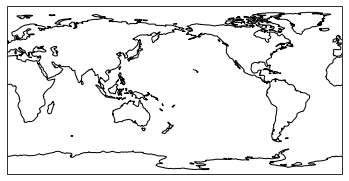

In [65]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

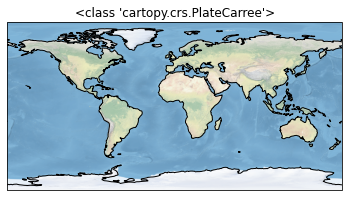

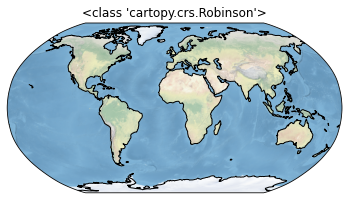

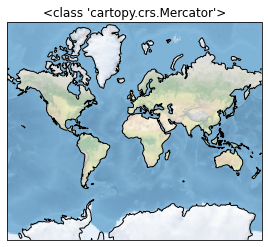

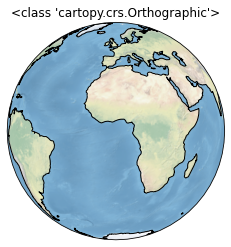

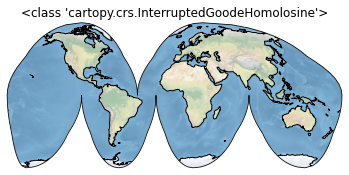

In [66]:
projections = [ccrs.PlateCarree(), ccrs.Robinson(), ccrs.Mercator(),ccrs.Orthographic(), ccrs.InterruptedGoodeHomolosine()]

for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

In [67]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      /scratch/midway2/achyutha11/miniconda3/envs/geoLD/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py
Type:      method


In [68]:
ax.coastlines?

Signature: ax.coastlines(resolution='auto', color='black', **kwargs)
Docstring:
Add coastal **outlines** to the current axes from the Natural Earth
"coastline" shapefile collection.

Parameters
----------
resolution : str or :class:`cartopy.feature.Scaler`, optional
    A named resolution to use from the Natural Earth
    dataset. Currently can be one of "auto" (default), "110m", "50m",
    and "10m", or a Scaler object.
File:      /scratch/midway2/achyutha11/miniconda3/envs/geoLD/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py
Type:      method


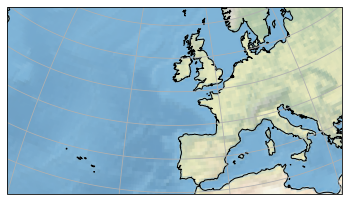

In [82]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.stock_img()
ax.coastlines(resolution="50m")

In [55]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
data_dir='/scratch/midway2/achyutha11/miniconda3/envs/geoLD/lib/python3.8/site-packages'
cartopy.config['data_dir']=data_dir
cartopy.config['data_dir']

'/scratch/midway2/achyutha11/miniconda3/envs/geoLD/lib/python3.8/site-packages'

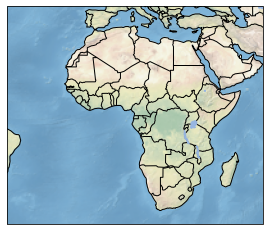

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-40,60,-40,45],crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN,color='white')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.stock_img()

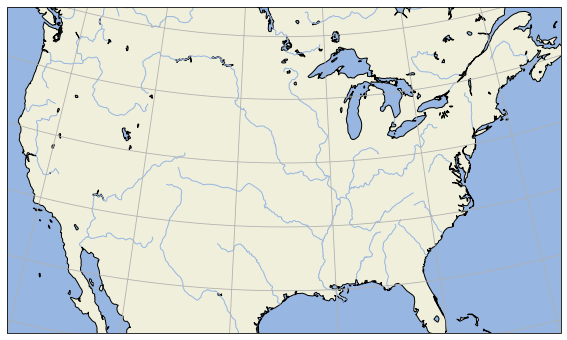

In [93]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120,-70,24,50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

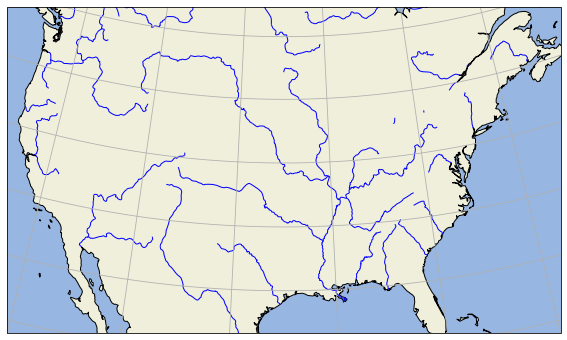

In [94]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

In [95]:
new_york=dict(lon=-74.0060,lat=40.7128)
honolulu=dict(lon=-157.8583,lat=21.3069)
lons = [new_york['lon'],honolulu['lon']]
lats = [new_york['lat'],honolulu['lat']]

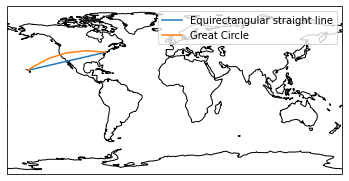

In [98]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons,lats, label='Great Circle',transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

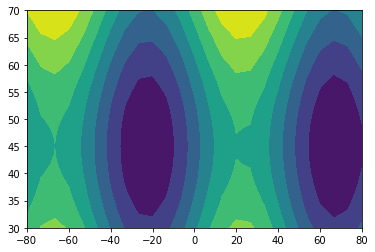

In [99]:
import numpy as np
lon = np.linspace(-80,80,25)
lat = np.linspace(30,70,25)
lon2d, lat2d = np.meshgrid(lon,lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

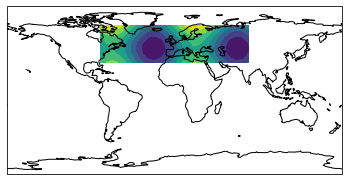

In [101]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

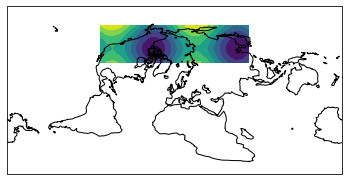

In [102]:
projection =ccrs.RotatedPole(pole_longitude=-177.5,pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon,lat,data)

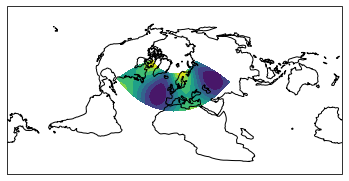

In [103]:
projection =ccrs.RotatedPole(pole_longitude=-177.5,pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon,lat,data,transform=ccrs.PlateCarree())